In [1]:
from importlib import reload
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: 0.23550024619811438, 4: 0.09677449415784367, 5: 2, 6: -0.2596447571645021, 7: -0.4686625002485648, 8: -0.2425661697016951, 9: -0.006932300643706424, 10: -0.042529858170053836, 11: 0.23045424890139443, 12: 0.06119852389205538, 13: -0.36567458859829804, 14: 0.3357102249115138, 15: 0.116556496250806, 16: 0.16930694793320855, 17: 0.3649291985742046, 18: 0.06392434076573983, 19: -0.4428297730455102, 20: 0.16685480430739674}


D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


37:	 [x = 8.872,], [y = -10.646,], [z = 2.490,], [A = 1543.037,], [bg = 3.791,],
53:	 [x = 2.399,], [y = 5.226,], [z = 9.629,], [A = 638.714,], [bg = 50.708,],
78:	 [x = -2.928,], [y = 7.757,], [z = 9.042,], [A = 1439.378,], [bg = 6.482,],
106:	 [x = 1.548,], [y = -2.775,], [z = 3.393,], [A = 567.438,], [bg = 17.274,],
66:	 [x = 7.575,], [y = 3.981,], [z = 4.211,], [A = 1482.853,], [bg = 61.401,],
61:	 [x = 8.644,], [y = -1.057,], [z = 0.932,], [A = 1875.955,], [bg = 97.881,],
6:	 [x = 7.542,], [y = -8.974,], [z = -4.774,], [A = 846.812,], [bg = 39.886,],
71:	 [x = -0.613,], [y = 7.619,], [z = -3.570,], [A = 1092.176,], [bg = 41.075,],
66:	 [x = 0.447,], [y = 1.424,], [z = 2.500,], [A = 1707.111,], [bg = 28.803,],
94:	 [x = -6.806,], [y = 5.378,], [z = 9.977,], [A = 1194.420,], [bg = 75.935,],
76:	 [x = -0.524,], [y = -6.950,], [z = -6.309,], [A = 1806.624,], [bg = 37.950,],
105:	 [x = 6.025,], [y = 3.095,], [z = 5.457,], [A = 1288.620,], [bg = 59.429,],
41:	 [x = -0.903,], [y = -2.933

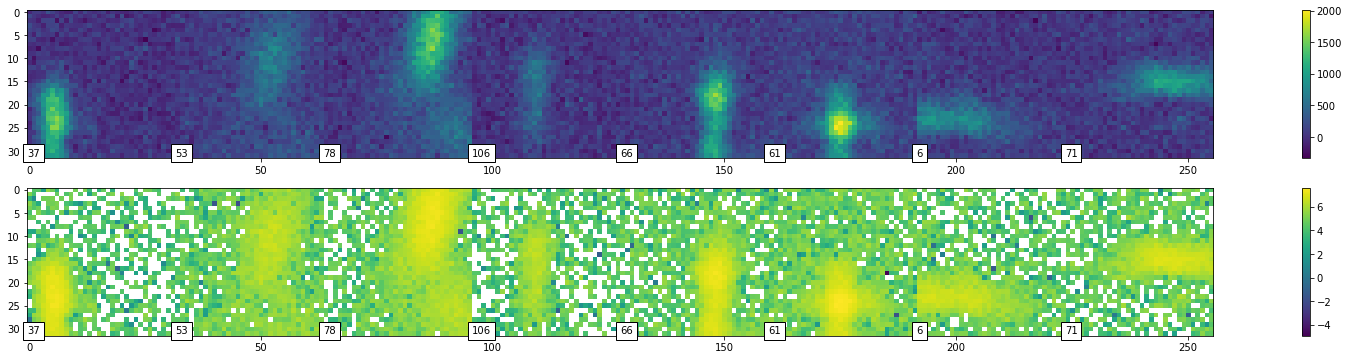

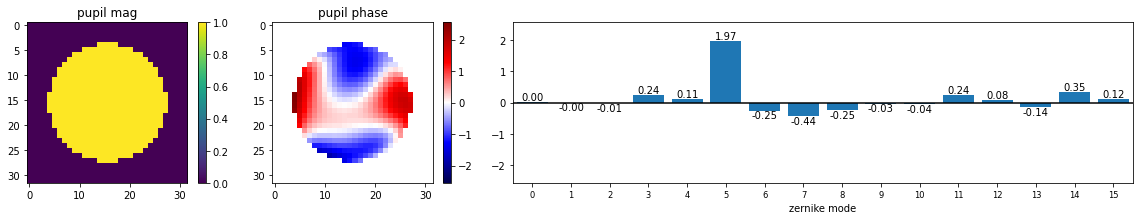

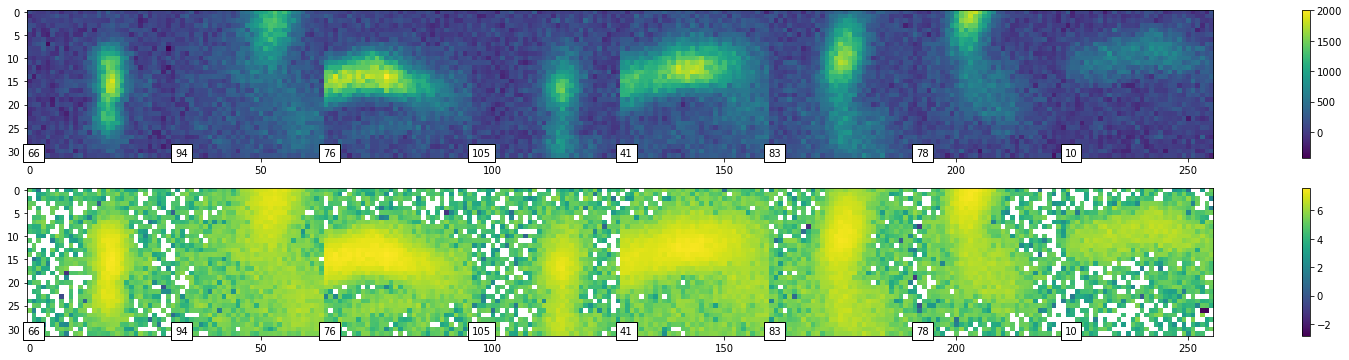

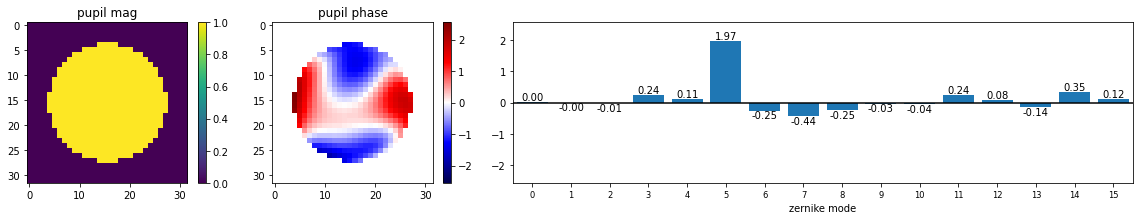

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    'padding': (4,4),
    'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA not available. Defaulting to CPU
Device: cpu
Saved to : models\Dec05_17-38-02_DESKTOP-7NNT713.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 126210.210938
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 109939.765625
****************************************************************************************************
Validation, average loss = 111742.164062
****************************************************************************************************
Saved to : checkpoints\Dec05_17-38-02_DESKTOP-7NNT713.ptc
model_state_dict: odict_keys(['encoders.conv_layer0.0.weight', 'encoders.conv_layer0.0.bias', 'encoders.conv_layer0.1.weight', 'encoders.conv_layer0.1.bias', 'encoders.conv_layer0.3.weight', 'encoders.conv_layer0.3.bias', 'encoders.conv_layer0.4.weight', 'encoders.conv_layer0.4.bias', 'encoders.conv_layer1.0.weight', 'encoders.conv_layer1.0.bias', 'encoders.conv_layer1.1.weight', 'encoders.conv_layer1.1.bias', 'encoders.conv_layer

D:\Github\smlm-dl\smlm_dl\model.py:551: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


Dec05_17-38-02_DESKTOP-7NNT713
No training data supplied. Rememer to set prior to training.
No validation data supplied. Rememer to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from models\Dec05_17-38-02_DESKTOP-7NNT713.ptm, last modified: Sun Dec  5 17:38:02 2021
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─ModuleDict: 1-1                        --
│    └─Sequential: 2-1                   --
│    │    └─GroupNorm: 3-1               2
│    │    └─Conv2d: 3-2                  160
│    │    └─ReLU: 3-3                    --
│    │    └─GroupNorm: 3-4               32
│    │    └─Conv2d: 3-5                  2,320
│    │    └─ReLU: 3-6                    --
│    │    └─MaxPool2d: 3-7               --
│    │    └─Dropout2d: 3-8               --
│    └─Sequential: 2-2                   --
│    │    └─GroupNorm: 3-9               32
│    │    └─Conv2d: 3-10                 4,640
│    │    └─ReLU: 3-11       

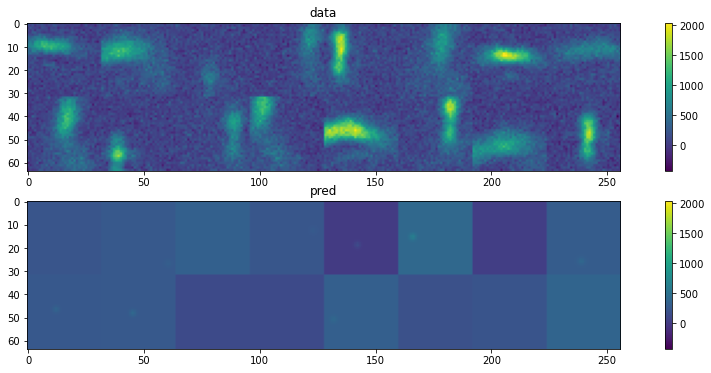

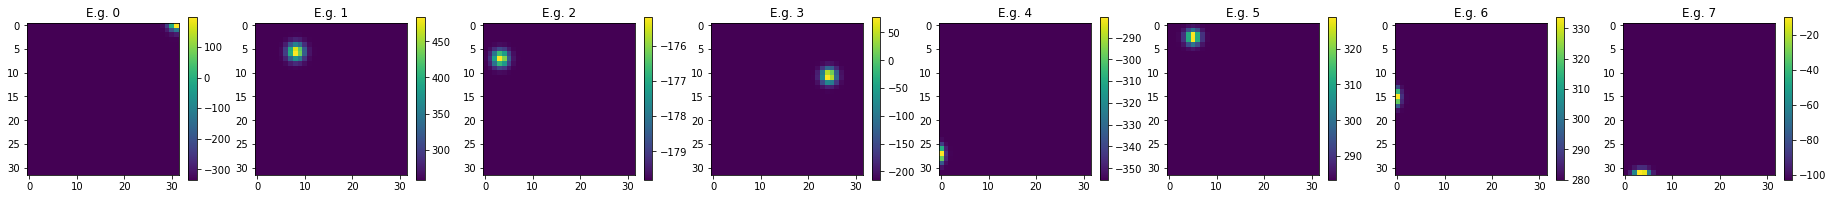

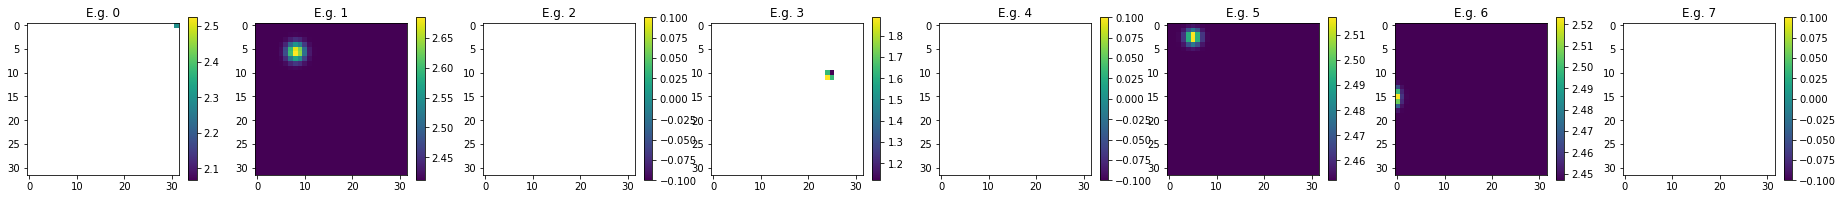

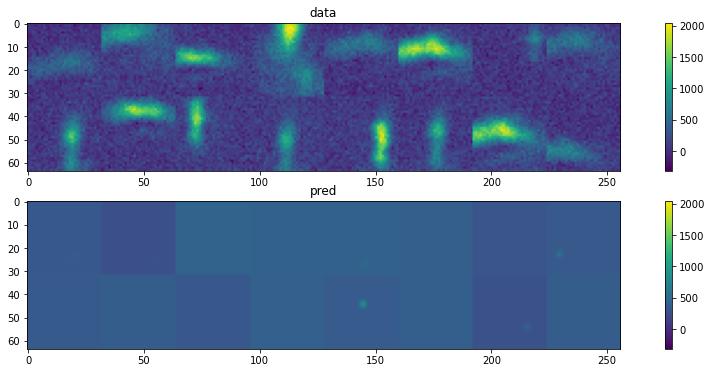

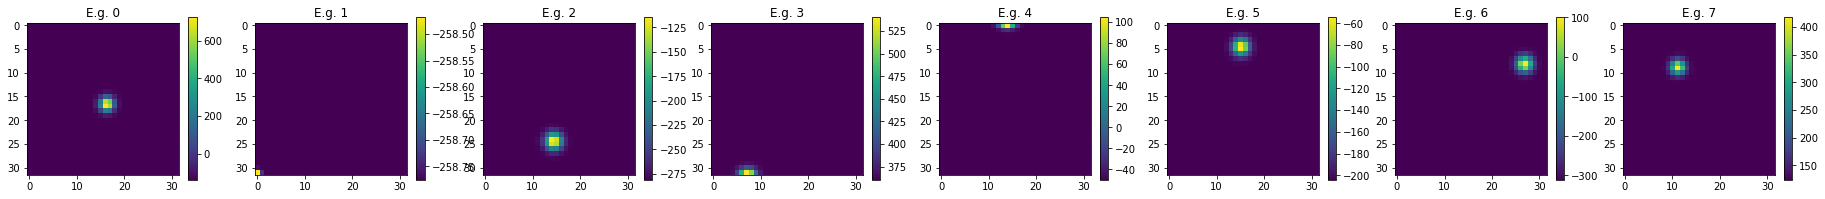

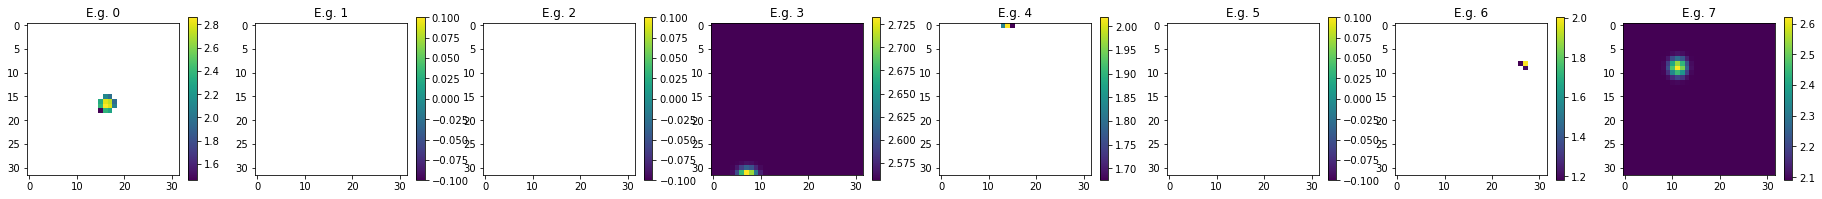

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filename = training.current_state["filename"]
print(filename)
training = trainer.FittingTrainer.from_model_file(os.path.join("models", filename + ".ptm"))
training.load_checkpoint(os.path.join("checkpoints",filename + ".ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : models\Dec05_17-38-13_DESKTOP-7NNT713.ptm
Starting training Epoch # 0


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Epoch # 0, Batch # 1 (128/128), loss = 134006.656250
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 134750.687500
****************************************************************************************************
Validation, average loss = 143206.218750
****************************************************************************************************
Saved to : checkpoints\Dec05_17-38-13_DESKTOP-7NNT713.ptc
model_state_dict: odict_keys(['encoders.conv_layer0.0.weight', 'encoders.conv_layer0.0.bias', 'encoders.conv_layer0.1.weight', 'encoders.conv_layer0.1.bias', 'encoders.conv_layer0.3.weight', 'encoders.conv_layer0.3.bias', 'encoders.conv_layer0.4.weight', 'encoders.conv_layer0.4.bias', 'encoders.conv_layer1.0.weight', 'encoders.conv_layer1.0.bias', 'encoders.conv_layer1.1.weight', 'encoders.conv_layer1.1.bias', 'encoders.conv_layer1.3.weight', 'encoders.conv_layer1.3.bias', 'encoders.conv_layer1.4.weight', 'encoders.conv_layer1.4.bias', 'encoders.conv_layer2.0

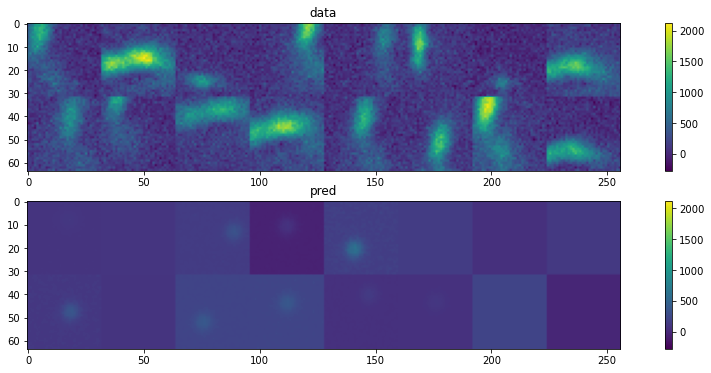

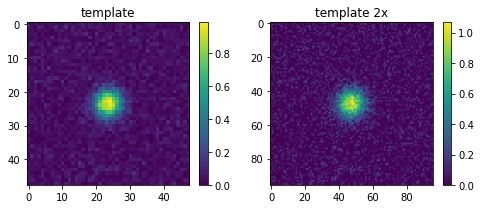

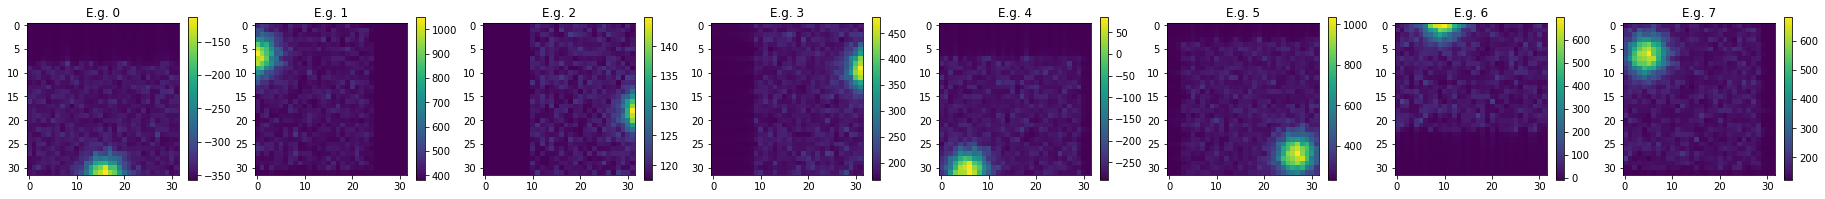

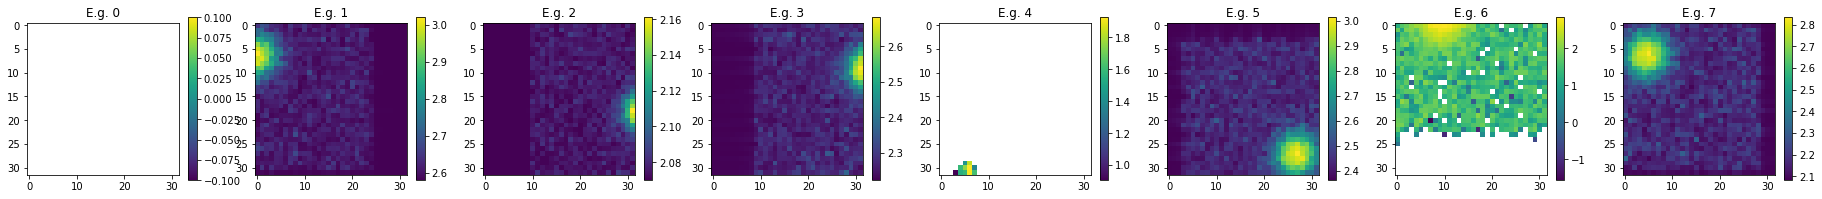

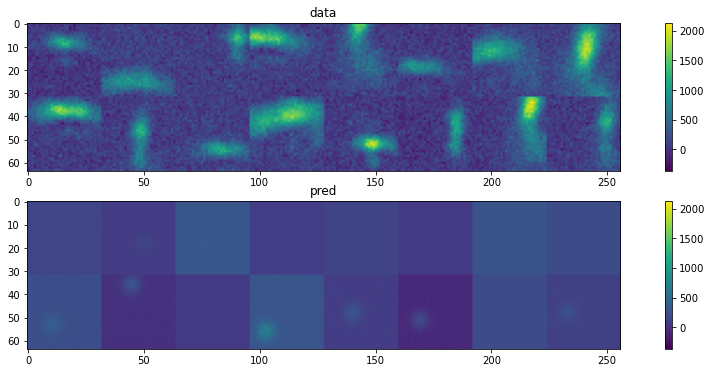

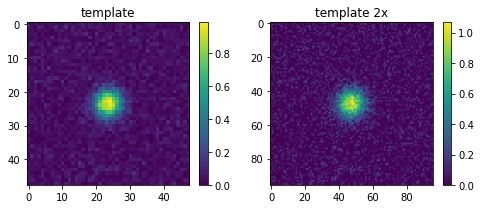

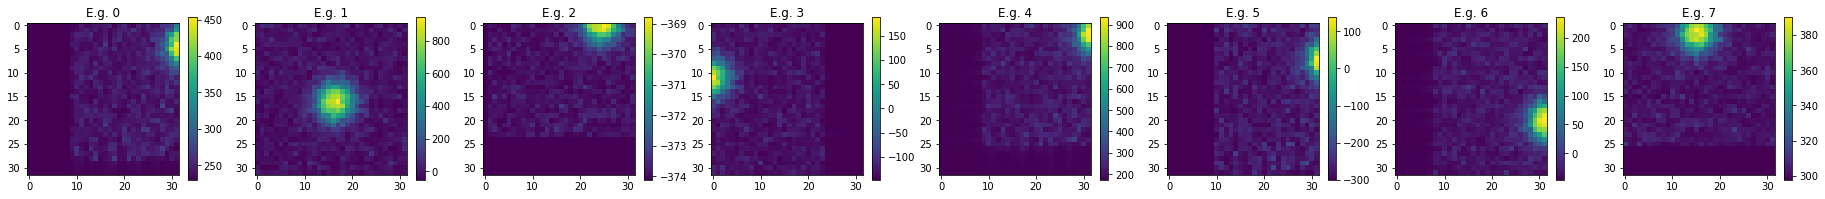

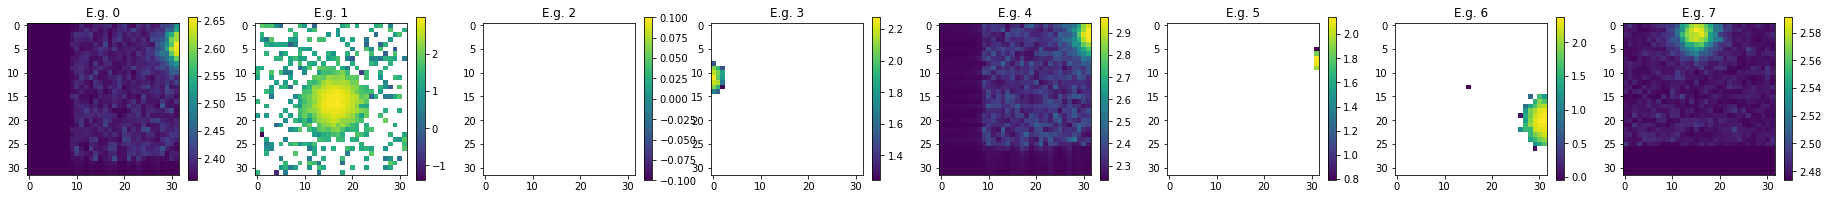

In [4]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      template_padding=(8,8),
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filename = training.current_state["filename"]
print(filename)
training = trainer.FittingTrainer.from_model_file(os.path.join("models", filename + ".ptm"))
training.load_checkpoint(os.path.join("checkpoints",filename + ".ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : models\Dec05_17-38-26_DESKTOP-7NNT713.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 130854.171875
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 147993.625000
****************************************************************************************************
Validation, average loss = 158153.562500
****************************************************************************************************
Saved to : checkpoints\Dec05_17-38-26_DESKTOP-7NNT713.ptc
model_state_dict: odict_keys(['encoders.conv_layer0.0.weight', 'encoders.conv_layer0.0.bias', 'encoders.conv_layer0.1.weight', 'encoders.conv_layer0.1.bias', 'encoders.conv_layer0.3.weight', 'encoders.conv_layer0.3.bias', 'encoders.conv_layer0.4.weight', 'encoders.conv_layer0.4.bias', 'encoders.conv_layer1.0.weight', 'encoders.conv_layer1.0.bias', 'encoders.conv_layer1.1.weight', 'encoders.conv_layer1.1.bias', 'encoders.conv_layer

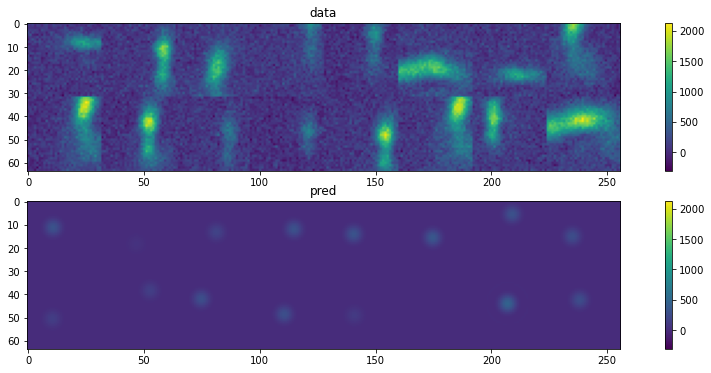

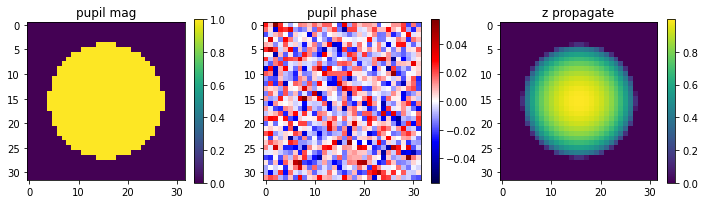

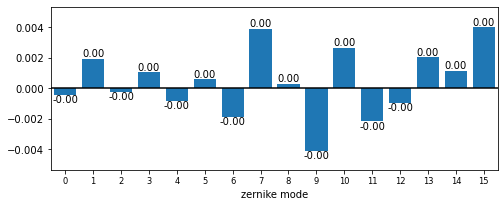

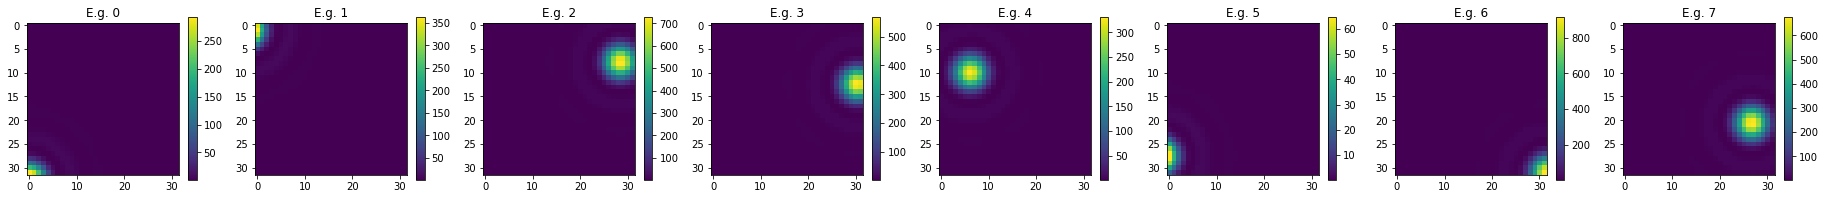

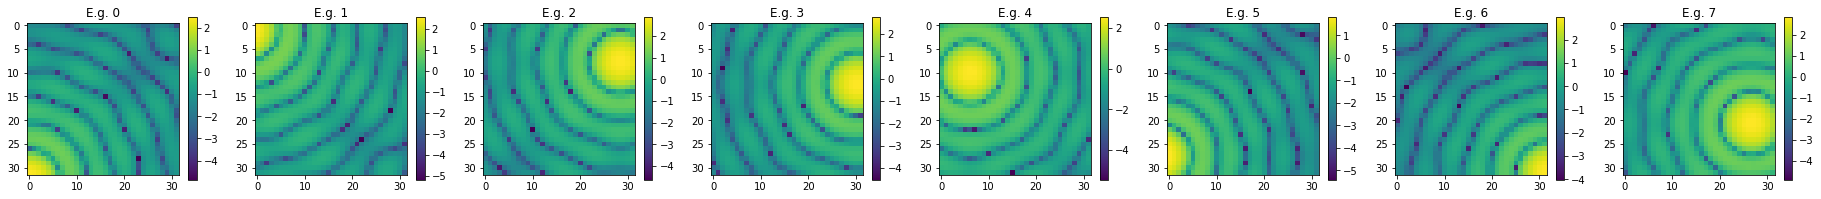

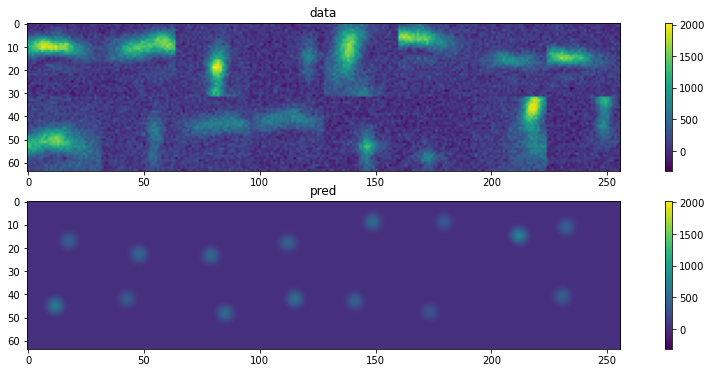

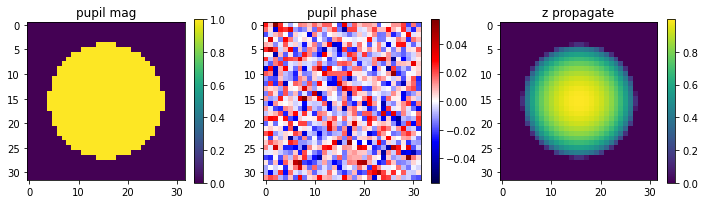

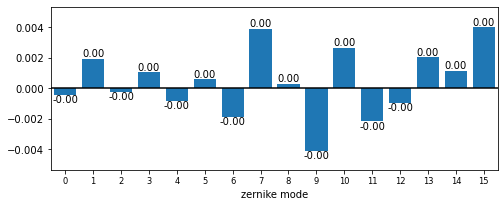

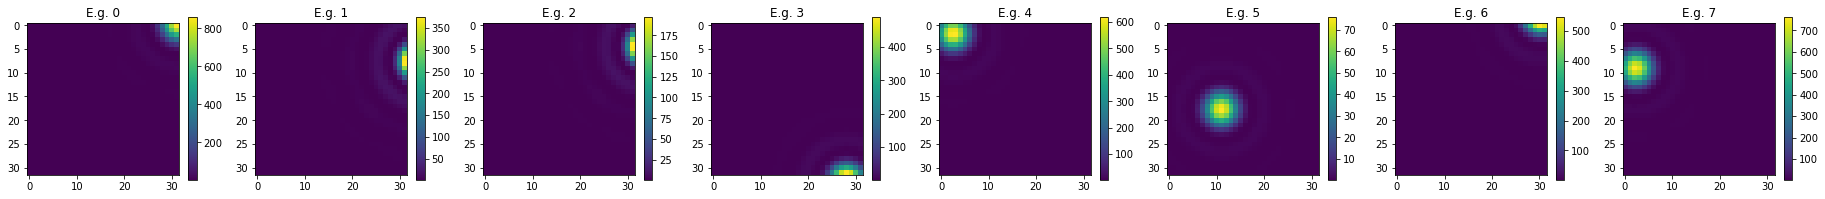

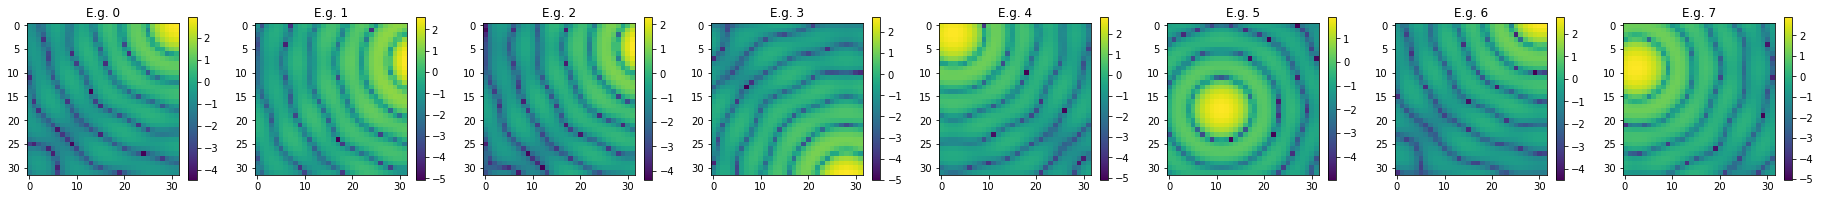

In [5]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filename = training.current_state["filename"]
print(filename)
training = trainer.FittingTrainer.from_model_file(os.path.join("models", filename + ".ptm"))
training.load_checkpoint(os.path.join("checkpoints",filename + ".ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )